In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
house_train = pd.read_csv('train.csv')
rows, columns = house_train.shape
rows, columns

(1460, 81)

In [4]:
house_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
house_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
print('No of duplicates: ' + str(house_train.duplicated().sum()))
house_train.Id.drop_duplicates()
house_train = house_train.drop_duplicates()
house_train = house_train.drop(columns=['Id'])

No of duplicates: 0


In [7]:
def d_types_report(house_train):
    columns=[]
    d_types=[]
    uniques=[]
    n_uniques=[]
    null_values=[]
    null_values_percentage=[]
    
    for i in house_train.columns:
        columns.append(i)
        d_types.append(house_train[i].dtypes)
        uniques.append(house_train[i].unique()[:5])
        n_uniques.append(house_train[i].nunique())
        null_values.append(house_train[i].isna().sum())
        null_values_percentage.append(null_values[-1] * 100 / rows)

    return pd.DataFrame({"Columns": columns, "Data_Types": d_types, "Unique_values": uniques, "N_Uniques": n_uniques,  "Null_Values": null_values, "Null_Values_percentage": null_values_percentage})
report = d_types_report(house_train)
report

,Columns,Data_Types,Unique_values,N_Uniques,Null_Values,Null_Values_percentage
0,MSSubClass,int64,"[60, 20, 70, 50, 190]",15,0,0.000000
1,MSZoning,object,"[RL, RM, C (all), FV, RH]",5,0,0.000000
2,LotFrontage,float64,"[65.0, 80.0, 68.0, 60.0, 84.0]",110,259,17.739726
3,LotArea,int64,"[8450, 9600, 11250, 9550, 14260]",1073,0,0.000000
4,Street,object,"[Pave, Grvl]",2,0,0.000000
...,...,...,...,...,...,...
75,MoSold,int64,"[2, 5, 9, 12, 10]",12,0,0.000000
76,YrSold,int64,"[2008, 2007, 2006, 2009, 2010]",5,0,0.000000
77,SaleType,object,"[WD, New, COD, ConLD, ConLI]",9,0,0.000000
78,SaleCondition,object,"[Normal, Abnorml, Partial, AdjLand, Alloca]",6,0,0.000000


In [8]:
numerical_columns = report[report['Data_Types'] != "object"]
numerical_columns_list = numerical_columns['Columns'].to_list()

In [9]:
report_null = report[report['Null_Values'] > 0]
report_null

,Columns,Data_Types,Unique_values,N_Uniques,Null_Values,Null_Values_percentage
2,LotFrontage,float64,"[65.0, 80.0, 68.0, 60.0, 84.0]",110,259,17.739726
5,Alley,object,"[nan, Grvl, Pave]",2,1369,93.767123
24,MasVnrType,object,"[BrkFace, None, Stone, BrkCmn, nan]",4,8,0.547945
25,MasVnrArea,float64,"[196.0, 0.0, 162.0, 350.0, 186.0]",327,8,0.547945
29,BsmtQual,object,"[Gd, TA, Ex, nan, Fa]",4,37,2.534247
30,BsmtCond,object,"[TA, Gd, nan, Fa, Po]",4,37,2.534247
31,BsmtExposure,object,"[No, Gd, Mn, Av, nan]",4,38,2.602740
32,BsmtFinType1,object,"[GLQ, ALQ, Unf, Rec, BLQ]",6,37,2.534247
34,BsmtFinType2,object,"[Unf, BLQ, nan, ALQ, Rec]",6,38,2.602740
41,Electrical,object,"[SBrkr, FuseF, FuseA, FuseP, Mix]",5,1,0.068493


### Imputing Missing Values
in some columns missing value perscentage is very high(>80%), So we can drop these columns
1. MiscFeature
2. Fence 
3. PoolQC
4. Alley

In [10]:
report_null_75 = report_null[report_null['Null_Values_percentage'] > 75]
report_null_75_list = report_null_75['Columns'].tolist()
house_train = house_train.drop(columns=report_null_75_list)
report_null_75_list

['Alley', 'PoolQC', 'Fence', 'MiscFeature']

In [11]:
report_null = report_null[~report_null['Columns'].isin(report_null_75_list)]

In [12]:
report_knn_categorical = report_null[report_null['Data_Types'] == "object"]
report_knn_categorical_list = report_knn_categorical['Columns'].tolist()

#### Imputing Numerical Columns

In [13]:
report_null_numerical = report_null[report_null['Data_Types'] != "object"]
report_null_numerical_list = report_null_numerical['Columns'].tolist()

In [14]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
mice_imputer = IterativeImputer()
for col in report_null_numerical_list:
    house_train[col] = mice_imputer.fit_transform(house_train[[col]])

report_null = report_null[~report_null['Columns'].isin(report_null_numerical_list)]
report_null

,Columns,Data_Types,Unique_values,N_Uniques,Null_Values,Null_Values_percentage
24,MasVnrType,object,"[BrkFace, None, Stone, BrkCmn, nan]",4,8,0.547945
29,BsmtQual,object,"[Gd, TA, Ex, nan, Fa]",4,37,2.534247
30,BsmtCond,object,"[TA, Gd, nan, Fa, Po]",4,37,2.534247
31,BsmtExposure,object,"[No, Gd, Mn, Av, nan]",4,38,2.602740
32,BsmtFinType1,object,"[GLQ, ALQ, Unf, Rec, BLQ]",6,37,2.534247
34,BsmtFinType2,object,"[Unf, BLQ, nan, ALQ, Rec]",6,38,2.602740
41,Electrical,object,"[SBrkr, FuseF, FuseA, FuseP, Mix]",5,1,0.068493
56,FireplaceQu,object,"[nan, TA, Gd, Fa, Ex]",5,690,47.260274
57,GarageType,object,"[Attchd, Detchd, BuiltIn, CarPort, nan]",6,81,5.547945
59,GarageFinish,object,"[RFn, Unf, Fin, nan]",3,81,5.547945


#### Impute categorical columns using Mode

In [15]:
report_null_categorical = report_null[report_null['Data_Types'] == "object"]
report_null_categorical_list = report_null_categorical['Columns'].tolist()
from sklearn.impute import SimpleImputer
for col in report_null_categorical_list:
    house_train[col]=house_train[col].fillna(house_train[col].mode()[0])
house_train.isnull().sum()[house_train.isnull().sum() > 0]

Series([], dtype: int64)

### Handling Outliers
#### Detecting Outliers using IQR based Method

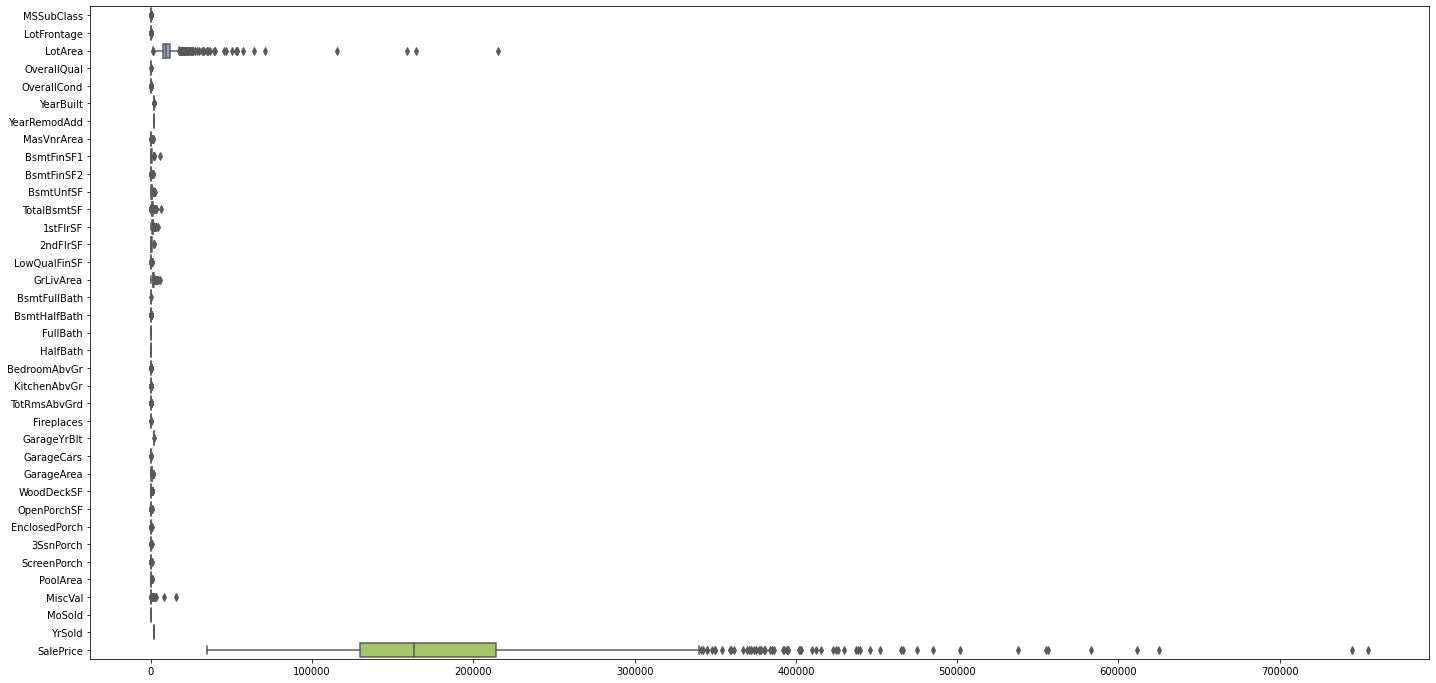

In [16]:
plt.figure(figsize=(24, 12))
ax = sns.boxplot(data=house_train, orient="h", palette="Set2")

In [17]:
for i in numerical_columns_list:
    fence = 1.5
    Q1=house_train[i].quantile(0.25)
    Q3=house_train[i].quantile(0.75)
    IQR=Q3-Q1
    Lower_Whisker = Q1-fence*IQR
    Upper_Whisker = Q3+fence*IQR
    house_train[i] = house_train[i].apply(lambda x: house_train[i].median() if (x > Upper_Whisker or x < Lower_Whisker)  else x)

#### Imputing outliers using z score method


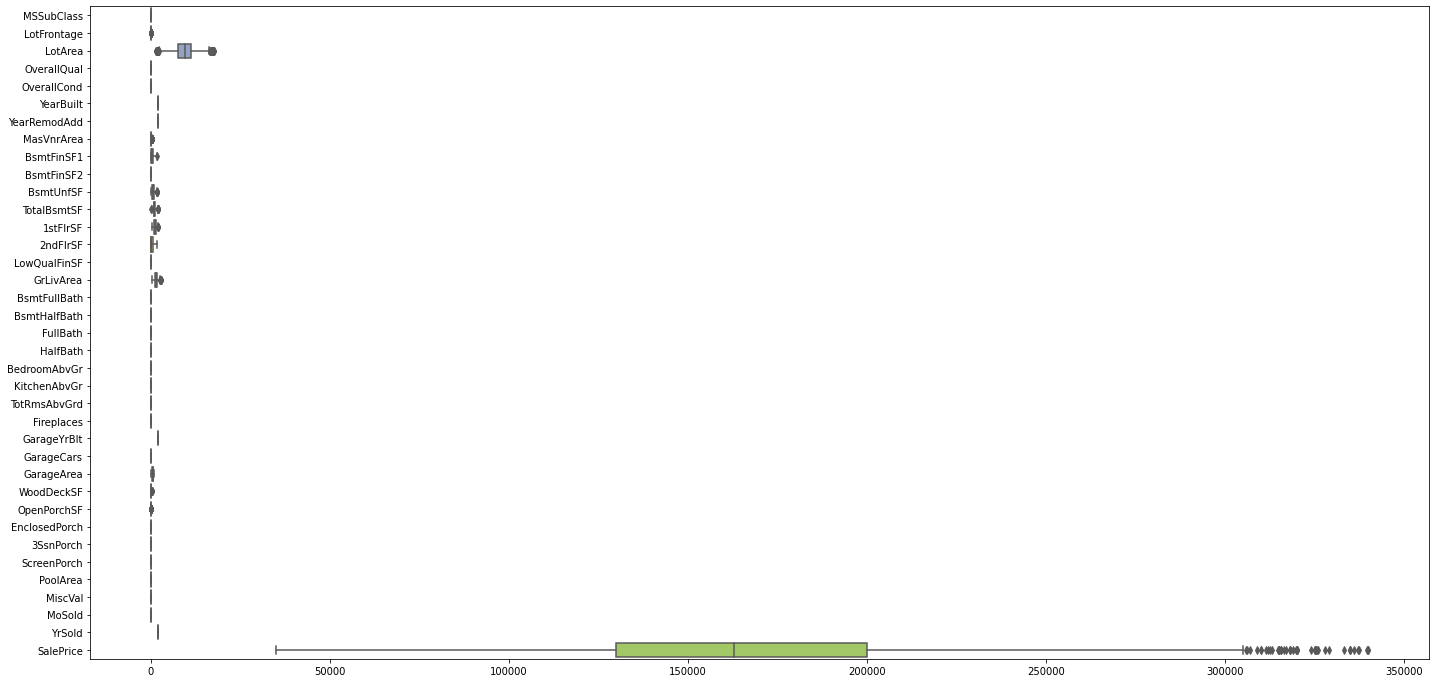

In [19]:
plt.figure(figsize=(24, 12))
ax = sns.boxplot(data=house_train, orient="h", palette="Set2")

### Data Dummies

In [20]:
encoded_house_train = pd.get_dummies(house_train)
encoded_house_train

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60.0,65.0,8450.0,7.0,5.0,2003.0,2003,196.0,706.0,0.0,...,0,0,0,1,0,0,0,0,1,0
1,20.0,80.0,9600.0,6.0,5.0,1976.0,1976,0.0,978.0,0.0,...,0,0,0,1,0,0,0,0,1,0
2,60.0,68.0,11250.0,7.0,5.0,2001.0,2002,162.0,486.0,0.0,...,0,0,0,1,0,0,0,0,1,0
3,70.0,60.0,9550.0,7.0,5.0,1915.0,1970,0.0,216.0,0.0,...,0,0,0,1,1,0,0,0,0,0
4,60.0,84.0,14260.0,8.0,5.0,2000.0,2000,350.0,655.0,0.0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60.0,62.0,7917.0,6.0,5.0,1999.0,2000,0.0,0.0,0.0,...,0,0,0,1,0,0,0,0,1,0
1456,20.0,85.0,13175.0,6.0,6.0,1978.0,1988,119.0,790.0,0.0,...,0,0,0,1,0,0,0,0,1,0
1457,70.0,66.0,9042.0,7.0,5.0,1941.0,2006,0.0,275.0,0.0,...,0,0,0,1,0,0,0,0,1,0
1458,20.0,68.0,9717.0,5.0,6.0,1950.0,1996,0.0,49.0,0.0,...,0,0,0,1,0,0,0,0,1,0


In [21]:
encoded_house_train.shape

(1460, 276)

In [22]:
cor = encoded_house_train.corr()
cor_target = abs(cor["SalePrice"])
relevent_features = cor_target[cor_target > 0.5]
relevent_features

OverallQual         0.697877
YearBuilt           0.556647
YearRemodAdd        0.525288
TotalBsmtSF         0.519806
GrLivArea           0.640551
FullBath            0.545586
GarageCars          0.590731
GarageArea          0.581248
SalePrice           1.000000
ExterQual_Gd        0.571612
ExterQual_TA        0.584141
Foundation_PConc    0.502321
BsmtQual_TA         0.517039
KitchenQual_TA      0.530164
GarageFinish_Unf    0.542723
Name: SalePrice, dtype: float64

In [23]:
highly_correlated_features = ['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', 'GrLivArea', 'FullBath', 'GarageCars', 'GarageArea', 'ExterQual_Gd', 'ExterQual_TA', 'Foundation_PConc', 'BsmtQual_TA', 'KitchenQual_TA', 'GarageFinish_Unf']

In [24]:
X = encoded_house_train.drop('SalePrice', 1)
y = encoded_house_train['SalePrice']

/tmp/ipykernel_29532/1177361904.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = encoded_house_train.drop('SalePrice', 1)


In [25]:
X = X[highly_correlated_features]
X.head()

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,GrLivArea,FullBath,GarageCars,GarageArea,ExterQual_Gd,ExterQual_TA,Foundation_PConc,BsmtQual_TA,KitchenQual_TA,GarageFinish_Unf
0,7.0,2003.0,2003,856.0,1710.0,2,2.0,548.0,1,0,1,0,0,0
1,6.0,1976.0,1976,1262.0,1262.0,2,2.0,460.0,0,1,0,0,1,0
2,7.0,2001.0,2002,920.0,1786.0,2,2.0,608.0,1,0,1,0,0,0
3,7.0,1915.0,1970,756.0,1717.0,1,3.0,642.0,0,1,0,1,0,1
4,8.0,2000.0,2000,1145.0,2198.0,2,3.0,836.0,1,0,1,0,0,0


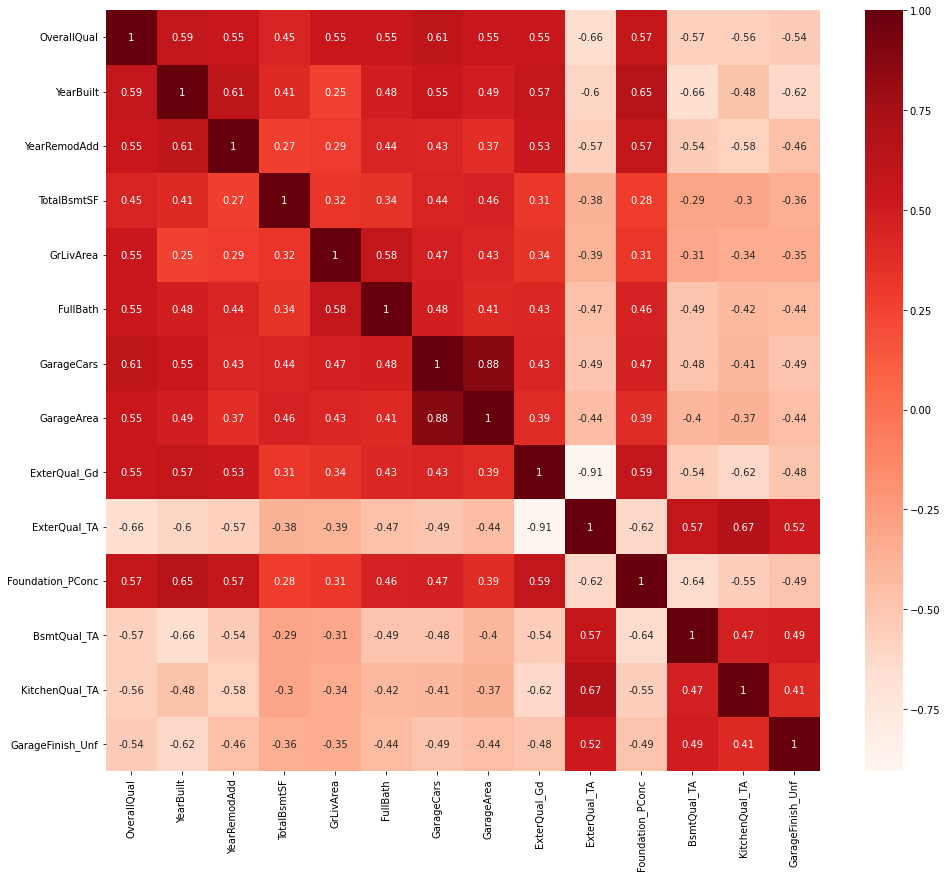

In [26]:
plt.figure(figsize=(16,14))
cor = X.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

#### Highly correlated features with each other
1. GarageArea, GarageCars
2. ExterQual_TA, ExterQual_Gd


In [27]:
selected_features = ['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', 'GrLivArea', 'FullBath', 'GarageCars', 'ExterQual_TA', 'Foundation_PConc', 'BsmtQual_TA', 'KitchenQual_TA', 'GarageFinish_Unf']
X = X[selected_features]
X.head()

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,GrLivArea,FullBath,GarageCars,ExterQual_TA,Foundation_PConc,BsmtQual_TA,KitchenQual_TA,GarageFinish_Unf
0,7.0,2003.0,2003,856.0,1710.0,2,2.0,0,1,0,0,0
1,6.0,1976.0,1976,1262.0,1262.0,2,2.0,1,0,0,1,0
2,7.0,2001.0,2002,920.0,1786.0,2,2.0,0,1,0,0,0
3,7.0,1915.0,1970,756.0,1717.0,1,3.0,1,0,1,0,1
4,8.0,2000.0,2000,1145.0,2198.0,2,3.0,0,1,0,0,0


### Modeling
#### Most Accurate Algorithms for a Regression Problem

1. Random Forest
2. Gradient Boosting Tree
3. Neural Network




In [28]:
from sklearn.model_selection import train_test_split
X_Train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=30)

#### 1. Random Forest Regressor

In [29]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()